In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv("../data/airmiles.csv",
                    index_col = "Date",
                    parse_dates = True,
                    dayfirst = True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [5]:
df = df.asfreq('MS')
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [6]:
df = df.rename(columns={'airmiles':'y'})
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


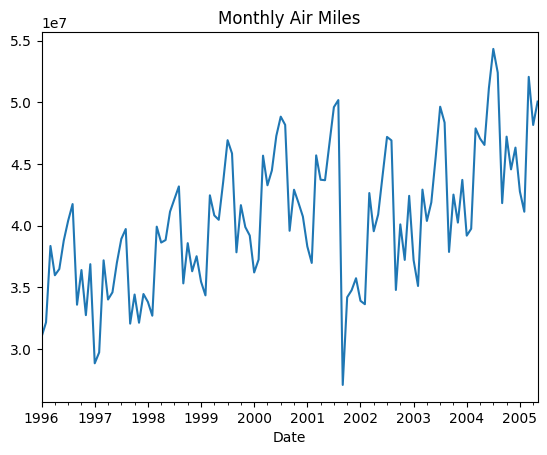

In [7]:
#EDA
#Monthly air miles line plot
df['y'].plot(title = 'Monthly Air Miles')
plt.show()

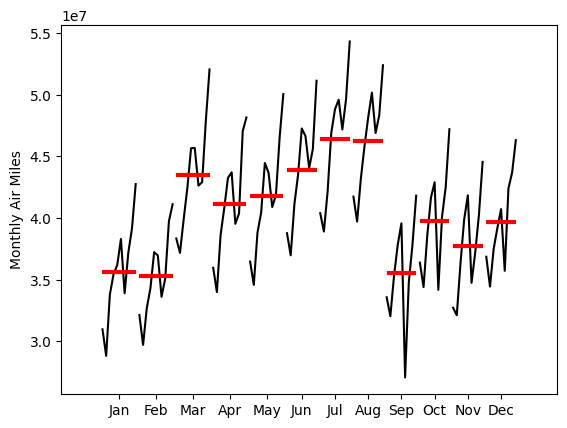

In [8]:
#Plotting the monthly seasonality 
month_plot(df['y'],
            ylabel = 'Monthly Air Miles')
plt.show()

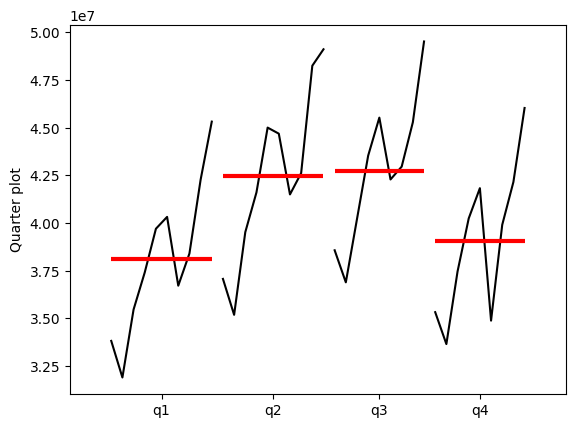

In [9]:
#Ploting Quarter plots
quarter_plot(df['y'].resample('Q').mean(),
                ylabel = 'Quarter plot')
plt.show()

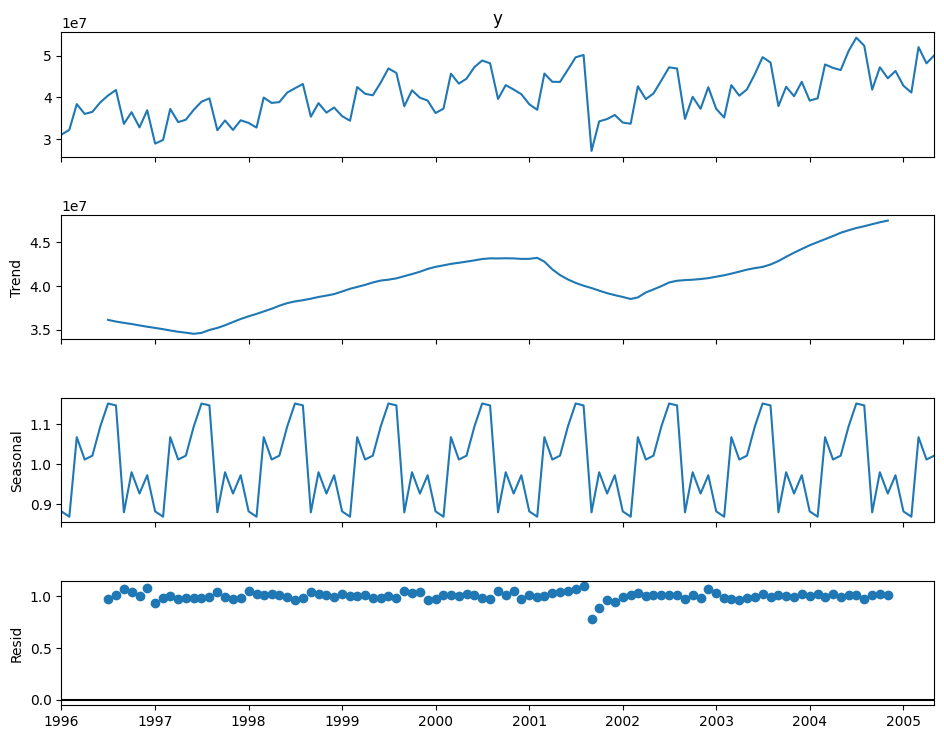

In [10]:
#Multiplicative model type with yearly seasonality(12 months)
decomposition = seasonal_decompose(df['y'],
                                    model = 'mul',
                                    period = 12)

fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

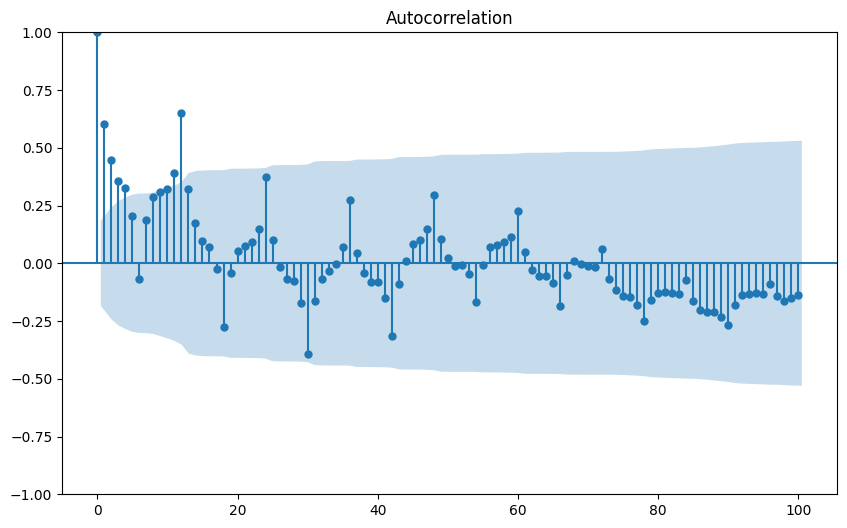

In [12]:
#ACF Plot
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

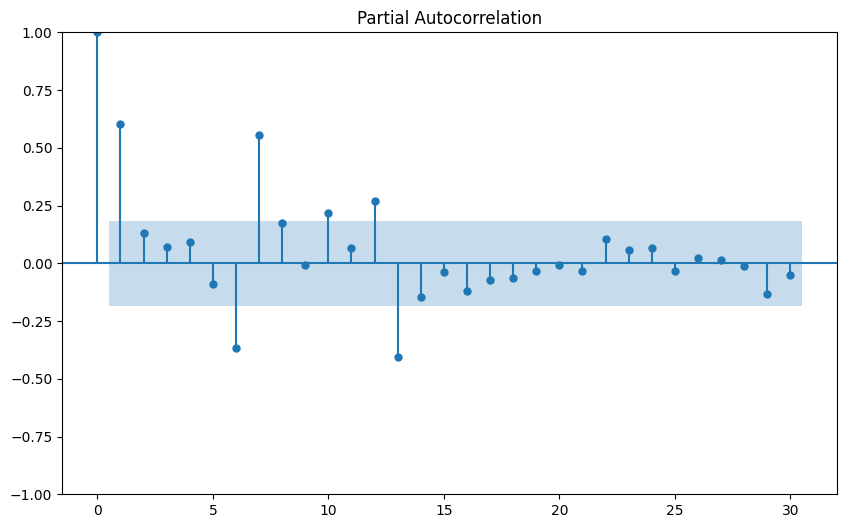

In [13]:
#PACF plots
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 30, ax = ax)
plt.show()

In [14]:
#Holt-Winters
#Train -Test split
#Last 12 months as test data
train, test = df.iloc[:-12,:], df.iloc[-12:,:]
test

,y
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665
2004-11-01,44553653
2004-12-01,46316602
2005-01-01,42760657
2005-02-01,41120838


In [15]:
#Holt winters Model - Exponential Smoothing model
model = ExponentialSmoothing(train,
                                trend = 'mul',
                                seasonal = 'mul',
                                seasonal_periods = 12).fit()

predictions = model.forecast(steps = len(test)).rename("Holt-Winters")
predictions

c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [20]:
#Model Assessment
#Function to assess model and vizualize output
def model_assessment(train, test, predictions, chart_title):
    #Ploting Train, Test, Forecast
    plt.figure(figsize=(10,4))
    plt.plot(train, label = 'Train')
    plt.plot(test, label = 'Test')
    plt.plot(predictions, label = "Forecast")
    plt.title(f"Train, Test and Predictions with {chart_title}")
    plt.legend()
    plt.show()
    
    #Calculating MAE, RMSE and MAPE
    mae = mean_absolute_error(test, predictions)
    rmse = mean_squared_error(test, predictions)**0.5
    mape = mean_absolute_percentage_error(test, predictions)
    
    print(f"MAE: is {mae:.2f}")
    print(f"RMSE: is {rmse:.2f}")
    print(f"MAPE: is {100*mape:.2f}%")

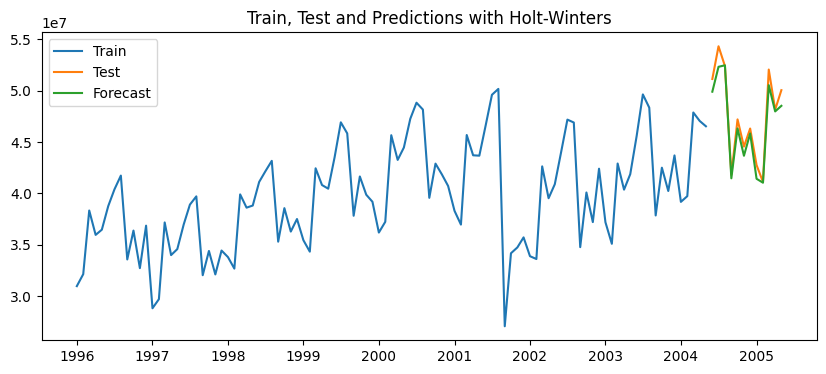

MAE: is 877575.16
RMSE: is 1075653.07
MAPE: is 1.80%


In [21]:
model_assessment(train, test, predictions, "Holt-Winters")

In [22]:
#Predicting the feature
model = ExponentialSmoothing(df['y'],
                                trend = 'mul',
                                seasonal='mul',
                                seasonal_periods = 12).fit()

predictions = model.forecast(steps = 12).rename("Holt-Winters")
predictions

c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2005-06-01    5.317705e+07
2005-07-01    5.585684e+07
2005-08-01    5.559980e+07
2005-09-01    4.374628e+07
2005-10-01    4.922822e+07
2005-11-01    4.655935e+07
2005-12-01    4.885796e+07
2006-01-01    4.429477e+07
2006-02-01    4.367190e+07
2006-03-01    5.397746e+07
2006-04-01    5.112520e+07
2006-05-01    5.178827e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [23]:
#Function to plot the feature plot
def plot_feature(y, forecast, title):
    plt.figure(figsize=(10,4))
    plt.plot(y, label = 'Train')
    plt.plot(forecast, label = "Forecast")
    plt.title(f"Train and Forecast with {title}")
    plt.legend()
    plt.show()

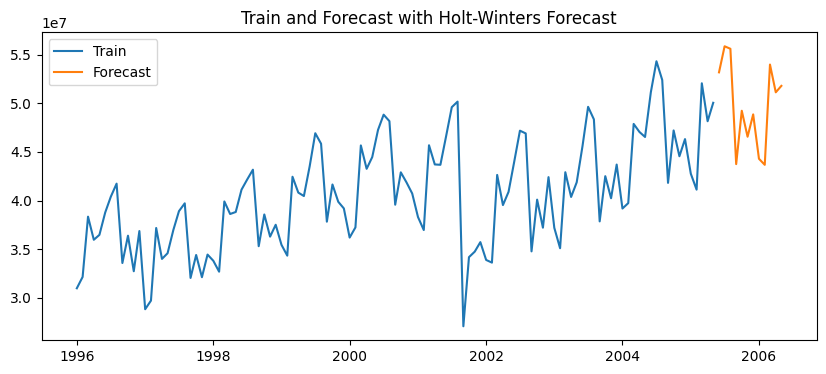

In [24]:
plot_feature(df['y'], predictions, 'Holt-Winters Forecast')